# Police Militarization and Public Casualties - EDA
Recent events have shown a light on the prevalence of police brutality and the deaths of members of the public at the hands of law enforcement officials. This analysis seeks to look at Police Precincts which have taken advantage of a federal program to purchase military surplus goods and whether or not this militarization of police leads to an increase in deaths of members of the public.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

df=pd.read_csv('Data/2_Full_Data.csv', index_col=0)
sns.set(style='whitegrid')

In [2]:
df.head()

,stStation,Quantity,Acquisition Value,city_name,deaths
1,AK: ANCHORAGE POLICE DEPARTMENT,17536.0,899408.67,AK: Anchorage,13.0
14,AK: FAIRBANKS POLICE DEPARTMENT,1.0,689000.00,AK: Fairbanks,2.0
30,AL: ALEXANDER CITY POLICE DEPARTMENT,404.0,1051110.76,AL: Alexander City,1.0
33,AL: ANNISTON POLICE DEPARTMENT,20.0,341056.00,AL: Anniston,2.0
36,AL: ARAB POLICE DEPARTMENT,290.0,265289.05,AL: Arab,1.0


In [3]:
df.describe()

,Quantity,Acquisition Value,deaths
count,1894.000000,1.894000e+03,1894.000000
mean,83.777719,1.424265e+05,2.503168
std,819.959139,4.081640e+05,5.998480
min,0.000000,0.000000e+00,1.000000
25%,0.000000,0.000000e+00,1.000000
50%,0.000000,0.000000e+00,1.000000
75%,2.000000,1.786107e+04,2.000000
max,22100.000000,5.752474e+06,124.000000


In [11]:
df = df[df.Quantity > 0]

<AxesSubplot:>

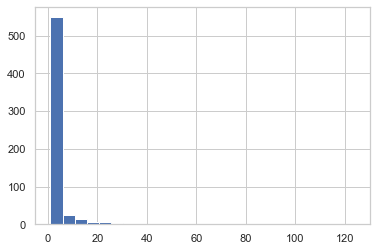

In [12]:
df.deaths.hist(bins=25)

At first glance it looks like the majority of precincts report less than 5 deaths overall. But we know the maximum reported by any department is 124. 

<AxesSubplot:>

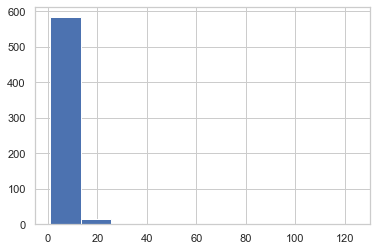

In [13]:
df.deaths.hist()

(0.0, 10.0)

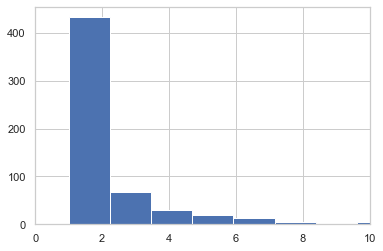

In [14]:
df.deaths.hist(bins=100)
plt.xlim(0,10)

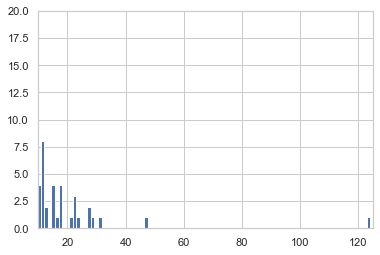

In [15]:
df.deaths.hist(bins=100)
plt.xlim(10,125)
plt.ylim(0,20)
plt.show()

While the vast majority of stations are reporting less than three deaths, there are still a number of stations with more than 10 civilian reaths reported.

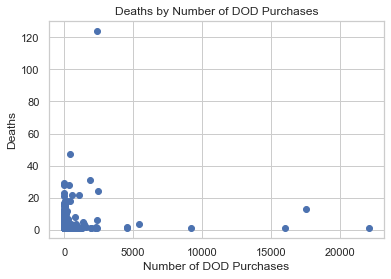

In [18]:
plt.scatter(df['Quantity'],df.deaths)
plt.xlabel('Number of DOD Purchases')
plt.ylabel('Deaths')
plt.title('Deaths by Number of DOD Purchases')
plt.show()

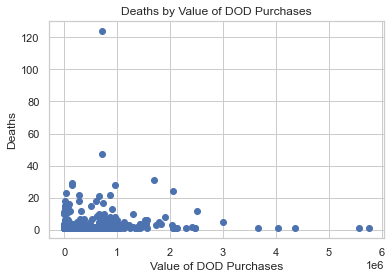

In [19]:
plt.scatter(df['Acquisition Value'],df.deaths)
plt.xlabel('Value of DOD Purchases')
plt.ylabel('Deaths')
plt.title('Deaths by Value of DOD Purchases')
plt.show()

Based on these scatter plots it does not look like there is a strong correlation of deaths either by the number of purchases made or the amount spent.

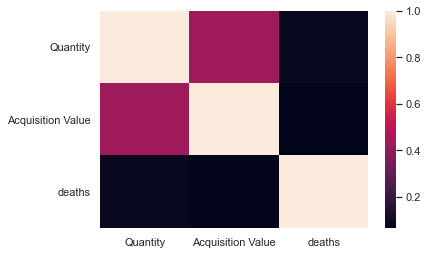

In [21]:
sns.heatmap(df.corr())
plt.show()

This analysis indicates that military purchases police departments have made have not officers more likely to kill the people they have been hired to serve and protect. However, there are limitations to this data. Not all precincts have reported the information on the civilians which have been killed by officers. This analysis also does not take into account incidences of police brutality that are non-fatal in nature.

# Broader Context

While there are fewer data points available, I was able to create a dataset that looked at a broader context of education, poverty, and city expenditures to look at what other factors may lead to deaths at the hands of police officers.

In [22]:
bd=pd.read_csv('Data/2_Full_Data_D.csv', index_col=0)

In [23]:
bd.head()

,Agency,DODPurchase_Quantity,DOD_TotalValue,deaths,pct_of_pop_grad_degree,pct_of_pop_college_degree,pct_of_pop_high_school_degree,city_state,pct_below_povline,pctBPL_workft,...,education_services_city,social_services_city,public_welfare_city,police_city,fire_city,correction_city,inspection_city,envir_housing_city,parks_recreation_city,housing_commdevt_city
0,AK: ANCHORAGE POLICE DEPARTMENT,17536.0,899408.67,13.0,11.8,31.7,93.4,AK: ANCHORAGE,9.5,1.6,...,2573.19250,94.20250,2.64125,452.82875,349.27625,0.00000,20.9325,375.53625,105.89875,18.79750
1,AK: FAIRBANKS POLICE DEPARTMENT,1.0,689000.00,2.0,12.1,32.6,94.5,AK: FAIRBANKS,8.1,1.5,...,0.00000,0.00000,0.00000,274.78500,217.81750,0.00000,18.7525,13.59750,2.64250,0.00000
2,AK: ALASKA STATE TROOPERS,0.0,0.00,1.0,12.1,32.6,94.5,AK: FAIRBANKS,8.1,1.5,...,0.00000,0.00000,0.00000,274.78500,217.81750,0.00000,18.7525,13.59750,2.64250,0.00000
3,AL: MOBILE POLICE DEPARTMENT,29.0,55033.00,5.0,7.8,22.9,86.2,AL: MOBILE,19.3,4.0,...,65.56375,35.62125,0.00000,248.83625,156.01375,39.10125,22.7675,466.86000,140.13750,14.40750
4,AZ: DOUGLAS POLICE DEPARTMENT,1.0,412000.00,1.0,13.5,31.9,88.3,AZ: TUCSON,17.8,4.0,...,0.00000,0.00000,0.00000,284.78375,166.14250,0.00000,0.0000,394.01250,100.42625,203.76875


In [24]:
bd.describe()

,DODPurchase_Quantity,DOD_TotalValue,deaths,pct_of_pop_grad_degree,pct_of_pop_college_degree,pct_of_pop_high_school_degree,pct_below_povline,pctBPL_workft,pctBPL_workpt,pctBPL_unempl,education_services_city,social_services_city,public_welfare_city,police_city,fire_city,correction_city,inspection_city,envir_housing_city,parks_recreation_city,housing_commdevt_city
count,79.000000,7.900000e+01,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,289.569620,1.789833e+05,3.974684,11.849367,30.818987,89.788608,14.634177,2.912658,19.456962,21.716456,309.590918,110.284161,18.778386,303.108528,191.173766,14.690285,15.899494,477.121250,106.405680,101.467168
std,1992.496905,4.003820e+05,6.468810,2.559942,5.537658,4.036246,3.468573,0.973016,4.391912,3.706039,888.520140,458.593057,45.490756,80.329924,63.882770,48.024522,35.098365,230.551519,71.131286,117.015500
min,0.000000,0.000000e+00,1.000000,5.400000,16.100000,73.800000,8.100000,1.500000,11.300000,14.700000,0.000000,0.000000,0.000000,142.726250,27.596250,0.000000,0.000000,13.597500,2.642500,0.000000
25%,0.000000,0.000000e+00,1.000000,10.200000,28.500000,88.350000,12.000000,2.100000,16.400000,18.950000,0.000000,4.423750,0.000000,264.261250,158.848750,0.000000,0.310000,335.477500,60.325000,27.790000
50%,0.000000,0.000000e+00,1.000000,12.200000,31.300000,90.400000,14.500000,2.900000,19.600000,21.100000,1.117500,22.736250,1.472500,286.677500,187.371250,0.000000,12.296250,460.283750,93.565000,55.145000
75%,1.000000,2.462150e+04,4.500000,13.600000,34.100000,92.300000,17.200000,3.500000,21.750000,24.200000,26.320000,56.680000,13.699375,329.741875,222.261875,0.000000,19.439375,511.467500,130.788125,129.890000
max,17536.000000,2.058051e+06,40.000000,17.800000,45.900000,95.500000,24.100000,5.800000,32.200000,31.600000,3891.816250,4025.557500,203.981250,493.916250,415.198750,215.226250,308.100000,1162.013750,336.805000,503.523750


In [25]:
bd = bd[bd.DODPurchase_Quantity > 0]

In [26]:
bd.corr()

,DODPurchase_Quantity,DOD_TotalValue,deaths,pct_of_pop_grad_degree,pct_of_pop_college_degree,pct_of_pop_high_school_degree,pct_below_povline,pctBPL_workft,pctBPL_workpt,pctBPL_unempl,education_services_city,social_services_city,public_welfare_city,police_city,fire_city,correction_city,inspection_city,envir_housing_city,parks_recreation_city,housing_commdevt_city
DODPurchase_Quantity,1.000000,0.189164,0.256224,-0.020360,0.012431,0.108368,-0.249595,-0.220568,-0.396574,-0.270378,0.394518,-0.042999,-0.076573,0.496730,0.494943,-0.077846,0.100431,-0.082073,0.025581,-0.215713
DOD_TotalValue,0.189164,1.000000,0.255625,-0.097656,-0.099603,-0.105131,-0.058823,0.127887,-0.211296,0.009082,0.102769,0.085488,0.226824,-0.110856,-0.173201,-0.316733,0.573974,-0.090516,-0.004893,-0.233714
deaths,0.256224,0.255625,1.000000,-0.229527,-0.291326,-0.598184,0.429179,0.497340,0.273876,0.382156,0.018639,-0.143972,-0.266772,-0.015539,-0.177908,-0.103139,0.465920,-0.270700,-0.136139,0.001961
pct_of_pop_grad_degree,-0.020360,-0.097656,-0.229527,1.000000,0.901607,0.582101,-0.378554,-0.472146,0.008212,-0.439033,0.331029,-0.267280,0.066054,0.353422,0.255301,-0.181359,-0.455617,-0.011942,0.118629,0.472068
pct_of_pop_college_degree,0.012431,-0.099603,-0.291326,0.901607,1.000000,0.734265,-0.630351,-0.648037,-0.192516,-0.644186,0.224784,-0.296377,0.039499,0.148940,0.179150,-0.132386,-0.498404,-0.072130,0.053232,0.274167
pct_of_pop_high_school_degree,0.108368,-0.105131,-0.598184,0.582101,0.734265,1.000000,-0.791287,-0.827552,-0.471383,-0.813308,0.186783,0.084421,0.062391,0.170954,0.359985,-0.000996,-0.585006,0.045579,0.060538,0.090463
pct_below_povline,-0.249595,-0.058823,0.429179,-0.378554,-0.630351,-0.791287,1.000000,0.888821,0.839525,0.941651,-0.234765,0.211375,-0.021441,-0.060359,-0.306859,0.076636,0.318758,0.146645,0.100080,0.167424
pctBPL_workft,-0.220568,0.127887,0.497340,-0.472146,-0.648037,-0.827552,0.888821,1.000000,0.716027,0.803332,-0.456424,0.104484,0.101215,-0.295179,-0.497650,-0.021885,0.427223,0.004273,0.086770,0.007851
pctBPL_workpt,-0.396574,-0.211296,0.273876,0.008212,-0.192516,-0.471383,0.839525,0.716027,1.000000,0.723371,-0.373114,0.123865,-0.066195,-0.111655,-0.264424,0.032751,0.071395,0.250904,0.215145,0.355420
pctBPL_unempl,-0.270378,0.009082,0.382156,-0.439033,-0.644186,-0.813308,0.941651,0.803332,0.723371,1.000000,-0.141590,0.139939,0.034449,-0.061889,-0.335390,0.092646,0.351231,0.216540,0.153844,0.013158


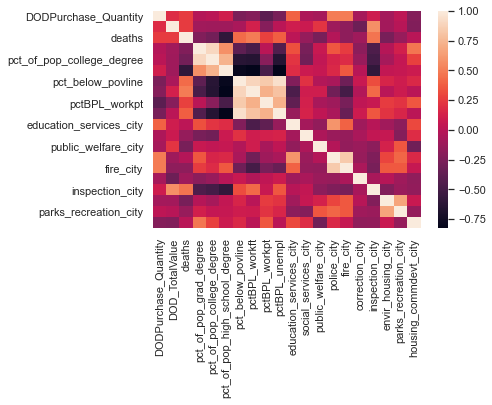

In [27]:
sns.heatmap(bd.corr())
plt.show()

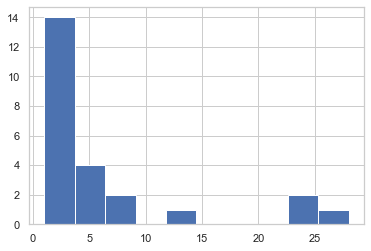

In [30]:
bd.deaths.hist()
plt.show()

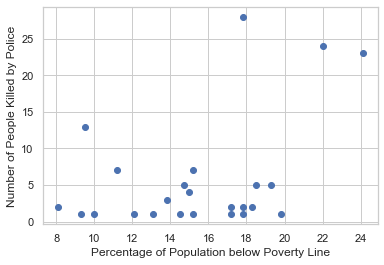

In [33]:
plt.scatter(bd.pct_below_povline, bd.deaths)
plt.xlabel('Percentage of Population below Poverty Line')
plt.ylabel('Number of People Killed by Police')
plt.show()

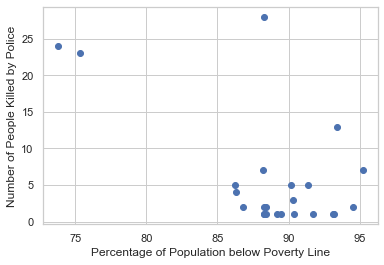

In [34]:
plt.scatter(bd.pct_of_pop_high_school_degree, bd.deaths)
plt.xlabel('Percentage of With High School Degrees')
plt.ylabel('Number of People Killed by Police')
plt.show()

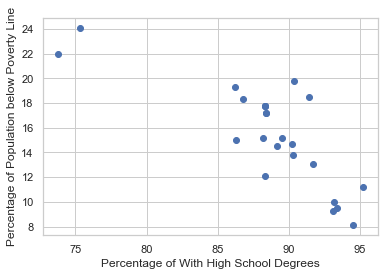

In [36]:
plt.scatter(bd.pct_of_pop_high_school_degree, bd.pct_below_povline)
plt.xlabel('Percentage of With High School Degrees')
plt.ylabel('Percentage of Population below Poverty Line')
plt.show()

These three plots demonstrate a clearer pattern, though not a direct correlation, that more people seem to be killed by cops in cities with higher rates of poverty and fewer people are killed by cops where more of the populace have at minimum a high school degree. There's also a stronger negative correlation between percentage of people living below the poverty line and the number of people with high school degrees. 

Though there are only a few data points in this set, it speaks to broader societal issues having an impact on fatal encounters between police and the public than police purchases from the Department of Defense. 